<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Credit_Card_Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection Project**

Credit card fraud detection is a set of methods and tools used to prevent and identify fraudulent credit card purchases. It can be used to stop fraud in real time or to investigate past transactions

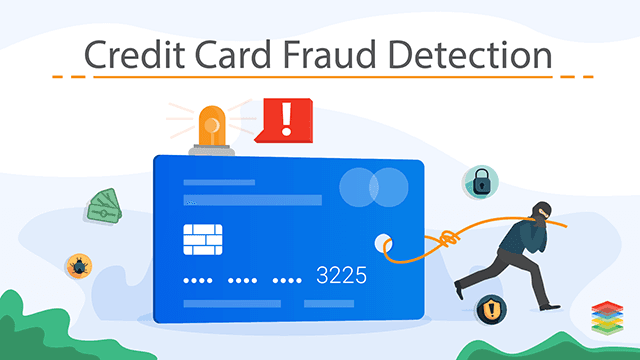

# **Credit Card Fraud Detection Using Decision Tree**

In [3]:
#import library
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load the data
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [5]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    20000 non-null  int64  
 1   V1      20000 non-null  float64
 2   V2      20000 non-null  float64
 3   V3      20000 non-null  float64
 4   V4      20000 non-null  float64
 5   V5      20000 non-null  float64
 6   V6      20000 non-null  float64
 7   V7      20000 non-null  float64
 8   V8      20000 non-null  float64
 9   V9      20000 non-null  float64
 10  V10     20000 non-null  float64
 11  V11     20000 non-null  float64
 12  V12     20000 non-null  float64
 13  V13     20000 non-null  float64
 14  V14     20000 non-null  float64
 15  V15     20000 non-null  float64
 16  V16     20000 non-null  float64
 17  V17     20000 non-null  float64
 18  V18     20000 non-null  float64
 19  V19     20000 non-null  float64
 20  V20     20000 non-null  float64
 21  V21     20000 non-null  float64
 22

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,30667.503000,-0.253597,-0.064480,0.714497,0.094638,-0.227266,0.128136,-0.057537,0.053137,-0.094132,...,-0.020893,-0.103456,-0.035918,0.015991,0.130121,0.006790,0.007869,0.006520,99.940908,0.003200
std,16718.320072,1.748823,1.617802,1.099111,1.361425,1.296820,1.309555,1.097443,1.044362,1.025356,...,0.674294,0.631515,0.578913,0.601027,0.431383,0.490282,0.370811,0.393460,263.755957,0.056479
min,0.000000,-56.407510,-72.715728,-12.988094,-4.817064,-32.092129,-26.160506,-19.399981,-25.838568,-7.083169,...,-13.990842,-5.707801,-13.085283,-2.761047,-4.232409,-1.438650,-8.358317,-8.364853,0.000000,0.000000
25%,36028.000000,-1.022598,-0.629234,0.180830,-0.787382,-0.872589,-0.633680,-0.572380,-0.141978,-0.692651,...,-0.219546,-0.529472,-0.186003,-0.322822,-0.130159,-0.333204,-0.057343,-0.007012,7.250000,0.000000
50%,38213.000000,-0.313121,0.077129,0.756333,0.129684,-0.277760,-0.141918,-0.041501,0.079295,-0.119674,...,-0.050439,-0.087339,-0.051496,0.070110,0.162130,-0.083648,0.011008,0.023449,28.700000,0.000000
75%,40340.000000,1.137722,0.729055,1.379024,0.995300,0.296713,0.515392,0.460257,0.367142,0.480362,...,0.123204,0.322545,0.083718,0.415834,0.410473,0.290509,0.090818,0.077928,89.912500,0.000000
max,47054.000000,1.685314,9.628396,4.101716,16.491217,34.801666,21.393069,34.303177,7.500621,9.272376,...,15.631453,4.393846,17.297845,3.679740,5.376595,3.463246,4.814408,33.847808,11898.090000,1.000000


In [7]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
#Visaulise the data using pariplot
sns.pairplot(df,hue='Class',palette='coolwarm')

**Train Test and Split**

In [7]:
#train test and split
from sklearn.model_selection import train_test_split
x=df.drop('Class',axis=1)
y=df['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
#print train and test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14000, 30)
(6000, 30)
(14000,)
(6000,)


# **Decision Tree**

In [8]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

# **Prediction and Evaluation**

In [9]:
#prediction
predictions=dtree.predict(x_test)

In [10]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[5968   15]
 [  15    2]]


In [12]:
#Classification Report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5983
           1       0.12      0.12      0.12        17

    accuracy                           0.99      6000
   macro avg       0.56      0.56      0.56      6000
weighted avg       0.99      0.99      0.99      6000



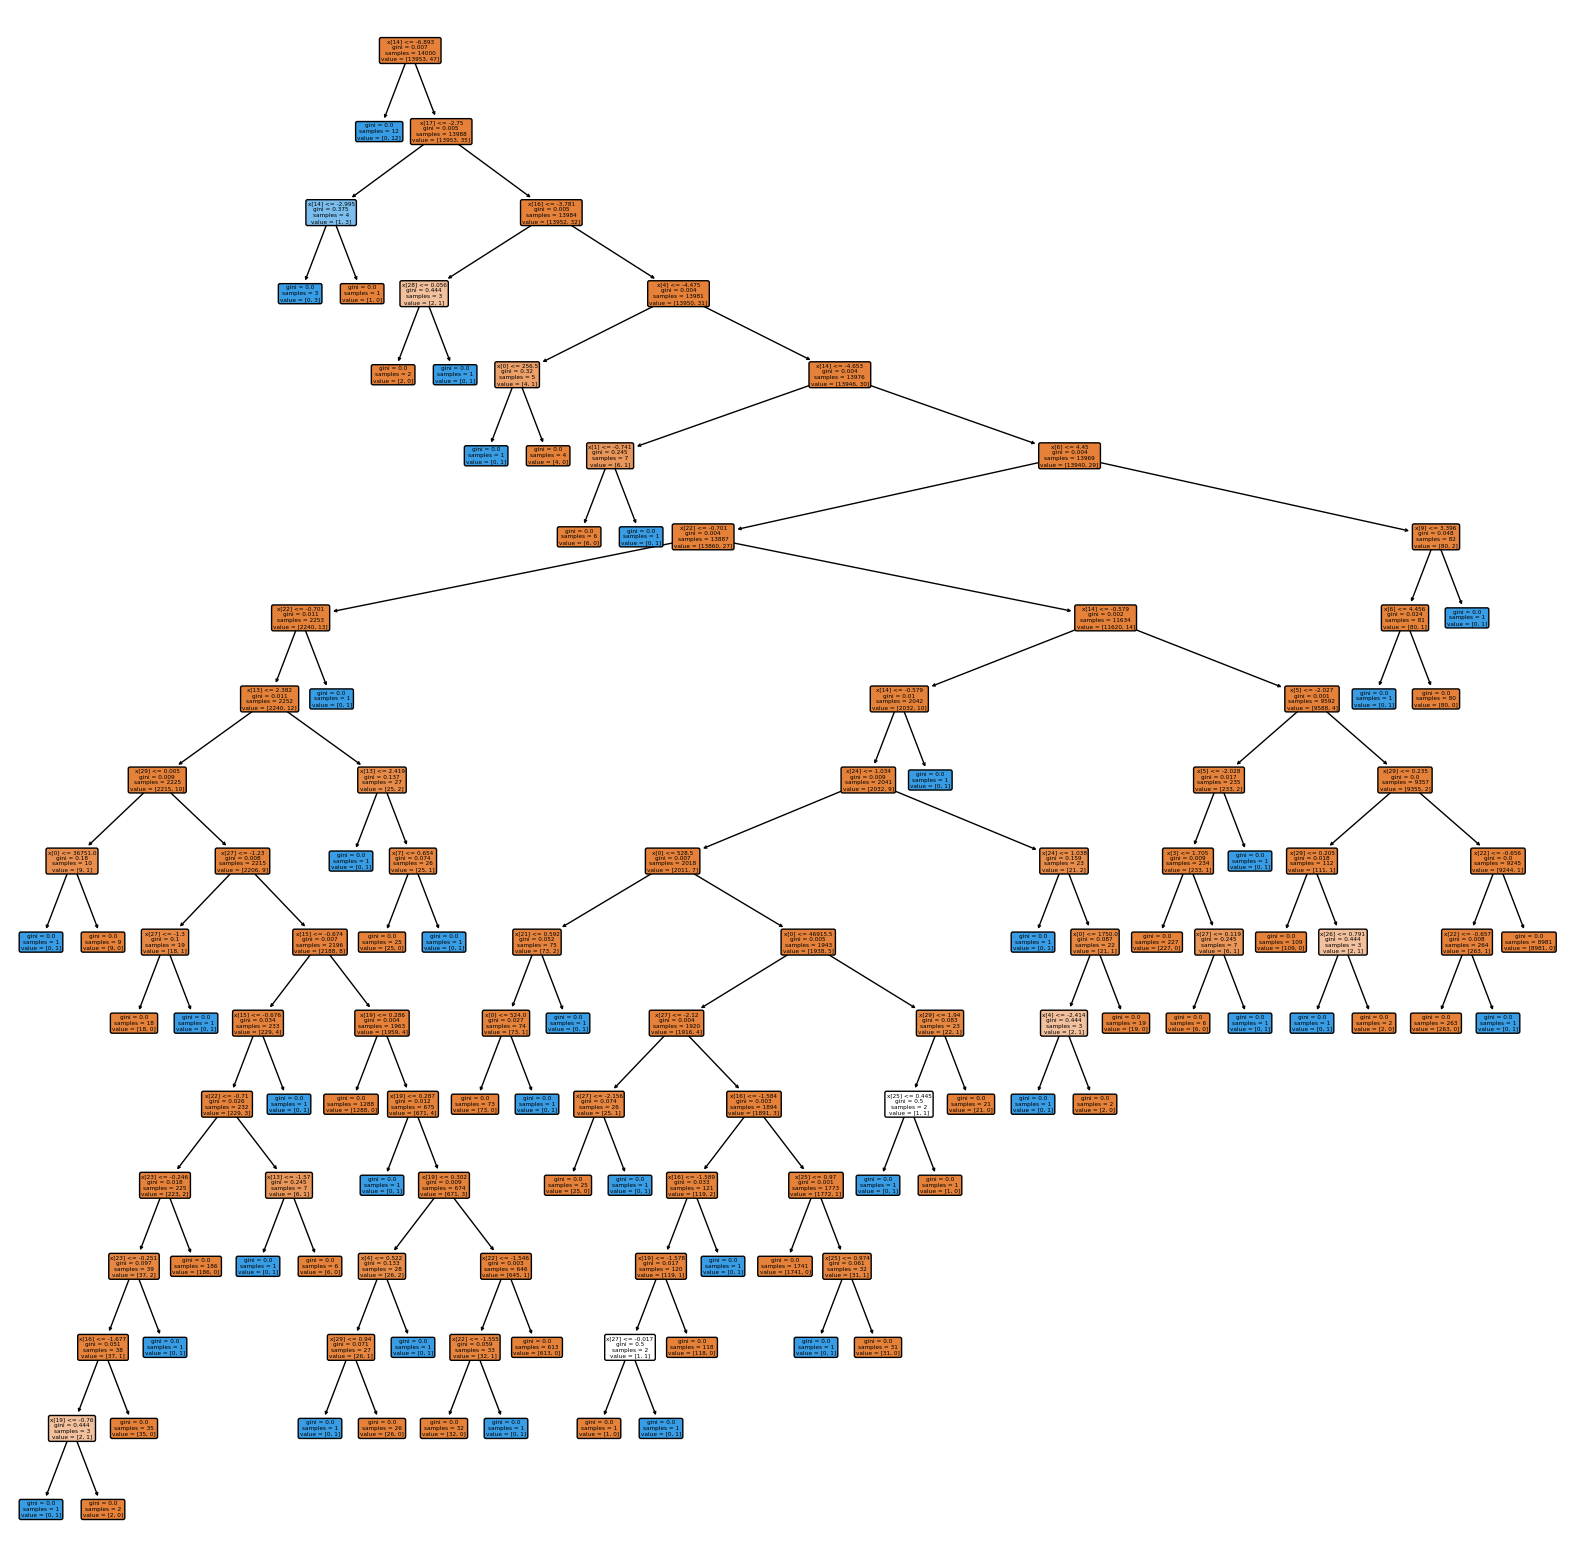

In [14]:
#visualise the data using tree
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dtree,filled=True,rounded=True)
plt.show()

# **KNN- K- Nearest Neighbor**

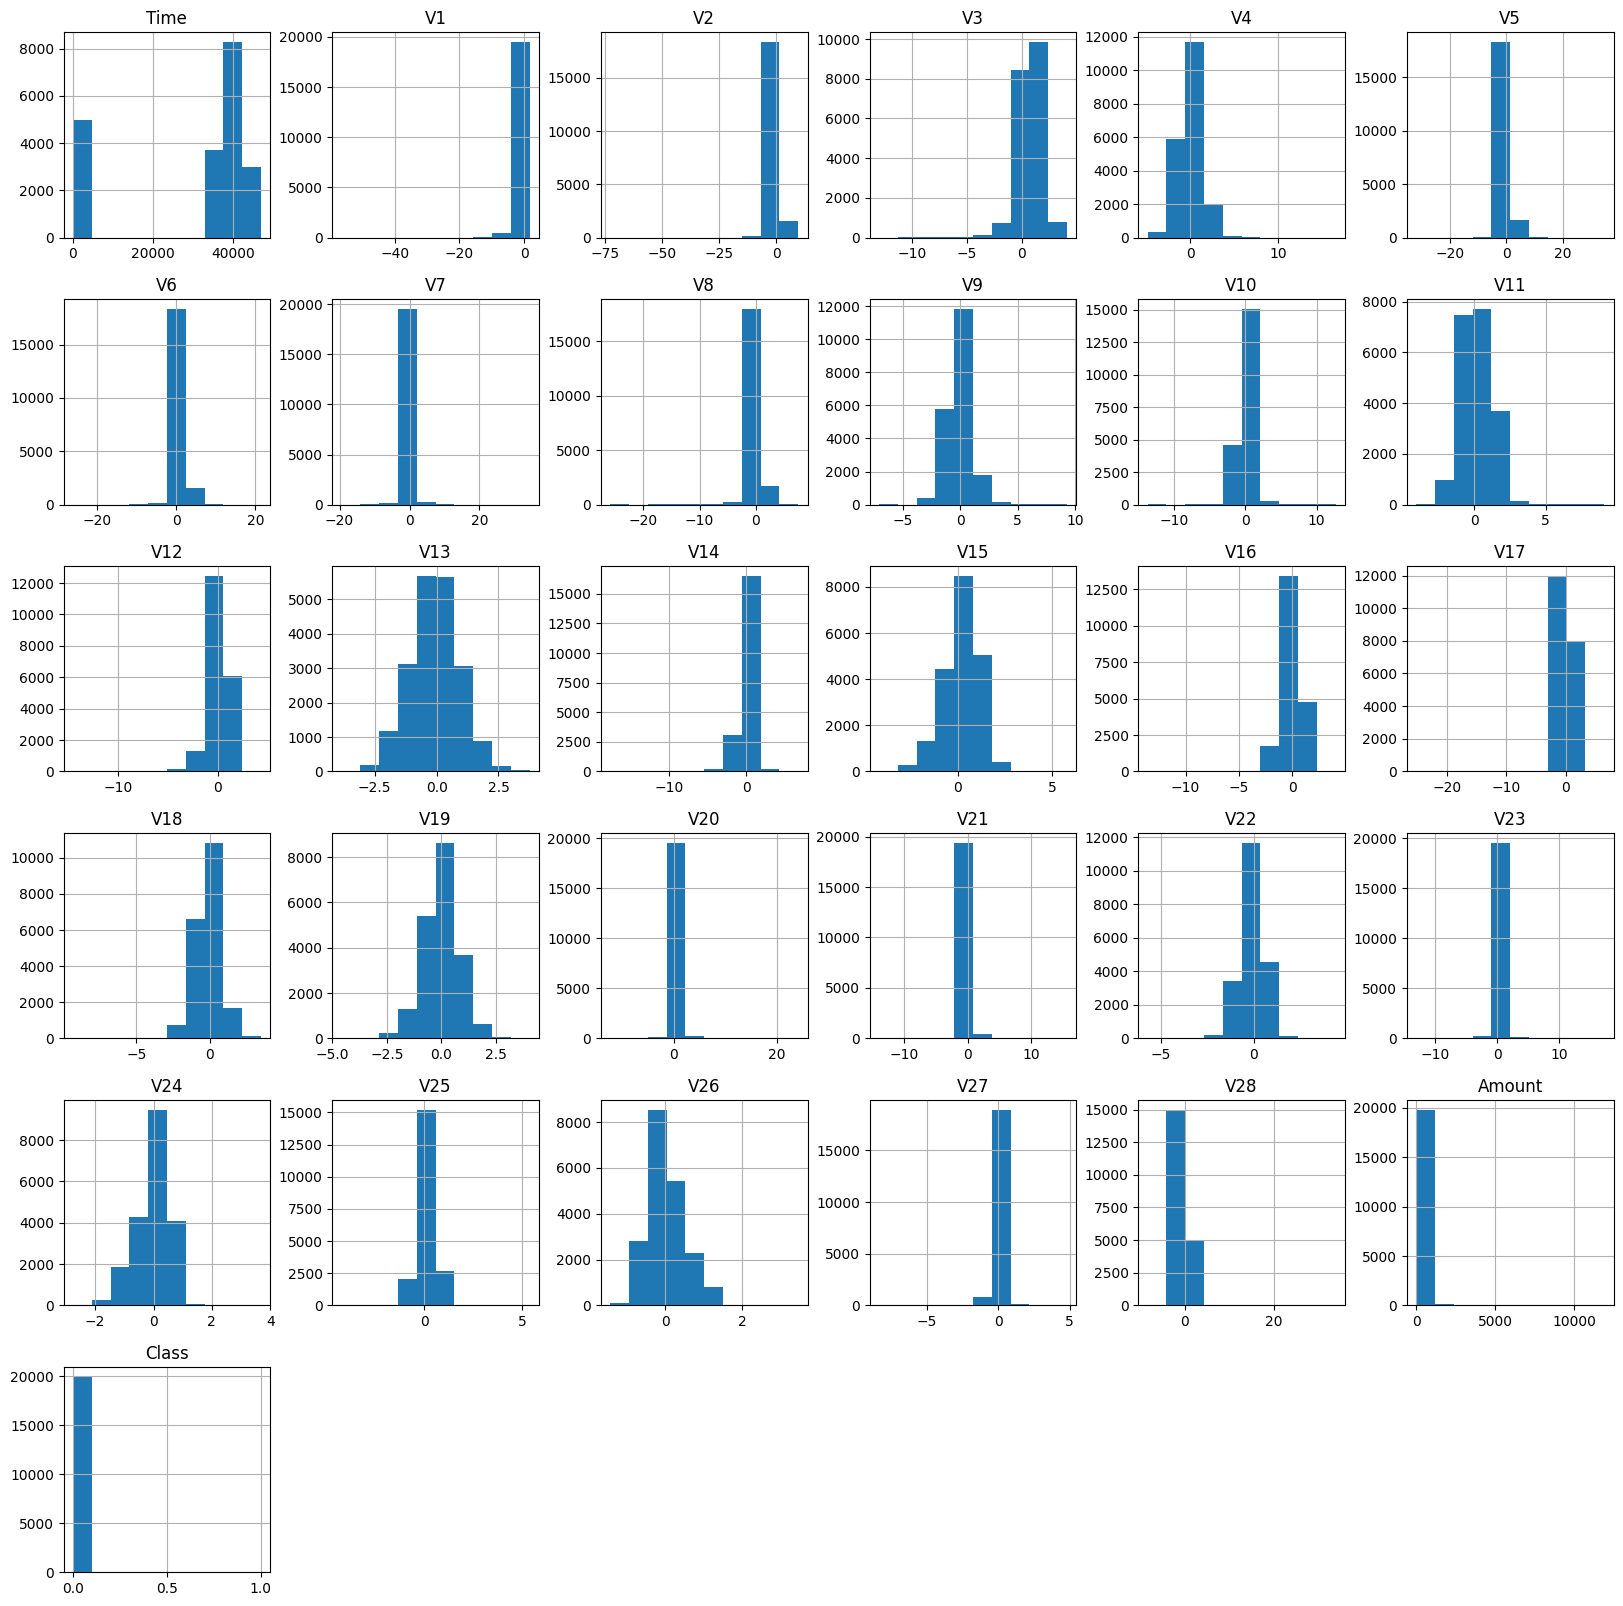

In [16]:
#display using histogram
df.hist(figsize=(20,20))
plt.show()

In [ ]:
#display using pirplot
sns.pairplot(df,hue='Class',palette='coolwarm')
plt.show()

In [ ]:
#standardize the variable
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(df.drop('Class',axis=1)))
y=df['Class']


In [19]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [20]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [21]:
#using knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
#prediction
pred=knn.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
#prediction and evaluation
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))

[[5961   19]
 [  18    2]]


<Axes: >

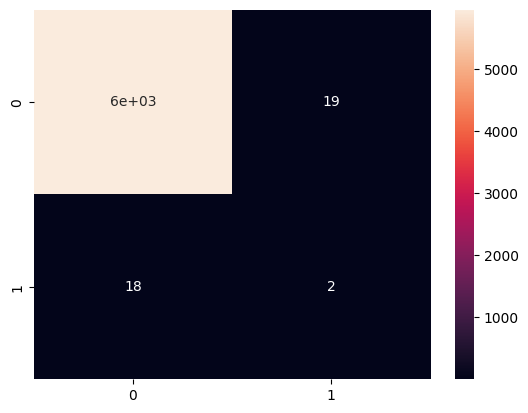

In [25]:
# visualise the data using chart
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [26]:
#display data after apply knn
print(classification_report(y_test,pred))
# P

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5980
           1       0.10      0.10      0.10        20

    accuracy                           0.99      6000
   macro avg       0.55      0.55      0.55      6000
weighted avg       0.99      0.99      0.99      6000

